In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import squarify
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
df = pd.read_csv(r"/kaggle/input/netflix-shows/netflix_titles.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.ffill(axis = 1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Jailbirds New Orleans,Jailbirds New Orleans,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Zombie Dumb,Zombie Dumb,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
df.dropna(how = 'any').shape

(5332, 12)

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(keep = 'first').shape

(8807, 12)

In [9]:
df.drop_duplicates(keep = 'last').shape

(8807, 12)

In [10]:
df.drop_duplicates(keep = False).shape

(8807, 12)

In [11]:
df.dropna(subset = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'], how = 'any').shape

(5332, 12)

In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['release_year'], object: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']}

In [14]:
df['type'] = pd.Categorical(df['type'])
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [15]:
df.loc[5541,'duration']='74 min'
df.loc[5794,'duration']='84 min'
df.loc[5813,'duration']='66 min'

In [16]:
df.loc[5541,'rating']='NR'
df.loc[5794,'rating']='NR'
df.loc[5813,'rating']='NR'

In [17]:
rate_ages = {'TV-MA': 'Adults', 'TV-14': 'Teenager', 'TV-PG' : 'Kids' , 'R': 'Adults' , 'PG-13': 'Teenager' , 
             'TV-Y7' : 'KidsAbove7', 'TV-Y': 'Kids', 'PG': 'Adults', 'TV-G': 'All', 'NR': 'Adults', 'G': 'All' , 
             'TV-Y7-FV':'KidsAbove7', 'NC-17': 'Adults', 'UR': 'Adults'}

In [18]:
# create new column to add new rating acording to ages stage
df['target_ages'] = df['rating'].replace(rate_ages)
#Check unique values for new column
df['target_ages'].unique()

array(['Teenager', 'Adults', 'Kids', 'KidsAbove7', 'All', nan],
      dtype=object)

In [19]:
df.director.fillna("No Director", inplace=True)
df.cast.fillna("No Cast", inplace=True)
df.country.fillna("Country Unavailable", inplace=True)
df.dropna(subset=["date_added", "rating"], inplace=True)

In [20]:
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
year_added      False
month_added     False
target_ages     False
dtype: bool

In [21]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
target_ages     0
dtype: int64

In [22]:
for i in range(len(df.isnull().sum())):
    if df.isnull().sum()[i] > 0:
        print('Total Number of missing values in ' + df.isnull().sum().index[i] + ' : ',df.isnull().sum()[i])

In [23]:
df["director"].fillna(method ='ffill', inplace = True)
df["cast"].fillna(method = 'ffill', inplace = True)
df["country"].fillna(method ='ffill', inplace = True)
df["date_added"].fillna(method ='ffill', inplace = True)
df["rating"].fillna(method = 'ffill', inplace = True)
df["duration"].fillna(method ='ffill', inplace = True)
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,Adults
8803,s8804,TV Show,Zombie Dumb,No Director,No Cast,Country Unavailable,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0,KidsAbove7
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,Adults
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,Adults
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,3.0,Teenager


In [24]:
df.nunique()

show_id         8793
type               2
title           8793
director        4528
cast            7680
country          749
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
description     8761
year_added        14
month_added       12
target_ages        5
dtype: int64

In [25]:

df.notnull().tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
8802,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8803,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8804,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8805,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8806,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [26]:
df.notnull().head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [27]:
df.apply(lambda x: x.dtype)

show_id                 object
type                  category
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added             float64
month_added            float64
target_ages             object
dtype: object

In [28]:
round((df.apply(lambda x:x.isnull().sum())/len(df))*100,2)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
year_added      0.0
month_added     0.0
target_ages     0.0
dtype: float64

In [29]:
#Checking for percentage of missing values in each columns
(df.isnull().sum()/len(df))*100

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
year_added      0.0
month_added     0.0
target_ages     0.0
dtype: float64

In [30]:

total_miss = df.isnull().sum()
perc_miss = total_miss/df.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':perc_miss})

missing_data.sort_values(by='Total missing',ascending=False).head(3)

,Total missing,% missing
show_id,0,0.0
type,0,0.0
title,0,0.0


In [31]:
print('Unique Values for Each Feature: \n')
for i in df.columns:
    print(i, ':',df[i].nunique()) 

Unique Values for Each Feature: 

show_id : 8793
type : 2
title : 8793
director : 4528
cast : 7680
country : 749
date_added : 1713
release_year : 74
rating : 14
duration : 220
listed_in : 513
description : 8761
year_added : 14
month_added : 12
target_ages : 5


In [32]:
# find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

show_id
['s1' 's2' 's3' ... 's8805' 's8806' 's8807']
title
['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
director
['Kirsten Johnson' 'No Director' 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
cast
['No Cast'
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaushal, Sarah-Jane Dias, Ra

In [33]:
numerical_data = df.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numerical_col = numerical_data.columns 

print("Numeric Features:")
print(numerical_data.head())
print("===="*20)

Numeric Features:
   release_year  year_added  month_added
0          2020      2021.0          9.0
1          2021      2021.0          9.0
2          2021      2021.0          9.0
3          2021      2021.0          9.0
4          2021      2021.0          9.0


In [34]:
categorical_data = df.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns                          # we will store the categorical features in a variable

print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water      No Director   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans      No Director   
4      s5  TV Show           Kota Factory      No Director   

                                                cast              country  \
0                                            No Cast        United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...         South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  Country Unavailable   
3                                            No Cast  Country Unavailable   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...                India   

  date_added rating   duration  \
0 2021-09-25  PG-13     90 min   
1 2021-09-24  TV-MA  2 Seasons   
2 2021-09-24  TV-MA   1 Season   
3 2021

In [35]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['show_id',
 'title',
 'director',
 'cast',
 'country',
 'rating',
 'duration',
 'listed_in',
 'description',
 'target_ages']

In [36]:
### numerical 
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['type', 'date_added', 'release_year', 'year_added', 'month_added']

In [37]:
### categorical
categorical_cols = list(df.select_dtypes(include=['object']))
categorical_cols

['show_id',
 'title',
 'director',
 'cast',
 'country',
 'rating',
 'duration',
 'listed_in',
 'description',
 'target_ages']

In [38]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  5


In [39]:
#Discrete Numerical Features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [40]:
#Continuous Numerical Features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count: {}".format(len(continuous_features)))

Continuous feature Count: 2


In [41]:
df.describe(include = object)

,show_id,title,director,cast,country,rating,duration,listed_in,description,target_ages
count,8793,8793,8793,8793,8793,8793,8793,8793,8793,8793
unique,8793,8793,4528,7680,749,14,220,513,8761,5
top,s1,Dick Johnson Is Dead,No Director,No Cast,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",Adults
freq,1,1,2621,825,2812,3205,1791,362,4,4379


In [42]:
show_id_Series = df['show_id']
show_id_levels = show_id_Series.unique()
show_id_levels

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [43]:
show_id_freq_table = pd.crosstab(index = df['show_id'], columns = 'freq')
show_id_freq_table

col_0,freq
show_id,
s1,1
s10,1
s100,1
s1000,1
s1001,1
...,...
s995,1
s996,1
s997,1


In [44]:
type_Series = df['type']
type_levels = type_Series.unique()
type_levels

['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']

In [45]:
type_freq_table = pd.crosstab(index = df['type'], columns = 'freq')
type_freq_table

col_0,freq
type,
Movie,6129
TV Show,2664


In [46]:
title_Series = df['title']
title_levels = title_Series.unique()
title_levels

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], dtype=object)

In [47]:
title_freq_table = pd.crosstab(index = df['title'], columns = 'freq')
title_freq_table

col_0,freq
title,
#Alive,1
#AnneFrank - Parallel Stories,1
#FriendButMarried,1
#FriendButMarried 2,1
#Roxy,1
...,...
忍者ハットリくん,1
海的儿子,1
마녀사냥,1


In [48]:
director_Series = df['director']
director_levels = director_Series.unique()
director_levels

array(['Kirsten Johnson', 'No Director', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [49]:
director_freq_table = pd.crosstab(index = df['director'], columns = 'freq')
director_freq_table

col_0,freq
director,
A. L. Vijay,2
A. Raajdheep,1
A. Salaam,1
A.R. Murugadoss,2
Aadish Keluskar,1
...,...
Çagan Irmak,1
Ísold Uggadóttir,1
Óskar Thór Axelsson,1


In [50]:
cast_Series = df['cast']
cast_levels = cast_Series.unique()
cast_levels

array(['No Cast',
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=object)

In [51]:
cast_freq_table = pd.crosstab(index = df['cast'], columns = 'freq')
cast_freq_table

col_0,freq
cast,
"'Najite Dede, Jude Chukwuka, Taiwo Arimoro, Odenike Odetola, Funmi Eko, Keppy Ekpenyong",1
"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, INFINITE, KARA, Shinee, Sistar, VIXX, Nine Muses, BTS, Secret, Topp Dogg",1
"50 Cent, Ryan Phillippe, Bruce Willis, Rory Markham, Jenna Dewan, Brett Granstaff, Randy Couture, Susie Abromeit, Ron Turner, James Remar",1
"A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasciore, Jake Johnson, Lauren Lapkus, Zachary Levi, BD Wong, David Gunning",1
A.R. Rahman,1
...,...
"İbrahim Büyükak, Zeynep Koçak, Gupse Özay, Cengiz Bozkurt",1
"İbrahim Çelikkol, Belçim Bilgin, Alican Yücesoy, Teoman Kumbaracıbaşı, Serdar Yeğin, Tülay Günal, Gözde Cığacı, Ferit Aktuğ, Rojda Demirer, Aybars Kartal Özson",1
"Şahin Irmak, İrem Sak, Gonca Vuslateri, Emre Karayel, Duygu Yetiş, Onur Buldu, Salih Kalyon, Bilge Şen, Nilgün Belgün, Hakan Akın",1


In [52]:
country_Series = df['country']
country_levels = country_Series.unique()
country_levels

array(['United States', 'South Africa', 'Country Unavailable', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United 

In [53]:
country_freq_table = pd.crosstab(index = df['country'], columns = 'freq')
country_freq_table

col_0,freq
country,
", France, Algeria",1
", South Korea",1
Argentina,56
"Argentina, Brazil, France, Poland, Germany, Denmark",1
"Argentina, Chile",2
...,...
Venezuela,1
"Venezuela, Colombia",1
Vietnam,7


In [54]:
date_added_Series = df['date_added']
date_added_levels = date_added_Series.unique()
date_added_levels

array(['2021-09-25T00:00:00.000000000', '2021-09-24T00:00:00.000000000',
       '2021-09-23T00:00:00.000000000', ...,
       '2018-12-06T00:00:00.000000000', '2016-03-09T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000'], dtype='datetime64[ns]')

In [55]:
date_added_freq_table = pd.crosstab(index = df['date_added'], columns = 'freq')
date_added_freq_table

col_0,freq
date_added,
2008-01-01,1
2008-02-04,1
2009-05-05,1
2009-11-18,1
2010-11-01,1
...,...
2021-09-21,5
2021-09-22,9
2021-09-23,2


In [56]:
rating_Series = df['rating']
rating_levels = rating_Series.unique()
rating_levels

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [57]:
rating_freq_table = pd.crosstab(index = df['rating'], columns = 'freq')
rating_freq_table

col_0,freq
rating,
G,41
NC-17,3
NR,82
PG,287
PG-13,490
R,799
TV-14,2157
TV-G,220
TV-MA,3205


In [58]:
duration_Series = df['duration']
duration_levels = duration_Series.unique()
duration_levels

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [59]:
duration_freq_table = pd.crosstab(index = df['duration'], columns = 'freq')
duration_freq_table

col_0,freq
duration,
1 Season,1791
10 Seasons,6
10 min,1
100 min,108
101 min,116
...,...
95 min,137
96 min,130
97 min,146


In [60]:
listed_in_Series = df['listed_in']
listed_in_levels = listed_in_Series.unique()
listed_in_levels

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [61]:
listed_in_freq_table = pd.crosstab(index = df['listed_in'], columns = 'freq')
listed_in_freq_table

col_0,freq
listed_in,
Action & Adventure,128
"Action & Adventure, Anime Features",1
"Action & Adventure, Anime Features, Children & Family Movies",4
"Action & Adventure, Anime Features, Classic Movies",2
"Action & Adventure, Anime Features, Horror Movies",1
...,...
"TV Horror, TV Mysteries, Teen TV Shows",1
"TV Horror, Teen TV Shows",2
"TV Sci-Fi & Fantasy, TV Thrillers",1


In [62]:
description_Series = df['description']
description_levels = description_Series.unique()
description_levels

array(['As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.',
       'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.',
       'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.',
       ...,
       'Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters.',
       'Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain.',
       "A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past."],
      dtype=object)

In [63]:
description_freq_table = pd.crosstab(index = df['description'], columns = 'freq')
description_freq_table

col_0,freq
description,
"""Bridgerton"" cast members share behind-the-scenes stories from the hit show, plus comedian Nikki Glaser breaks down the costume drama's sexiest moments.",1
"""Brooklyn Nine-Nine"" star Chelsea Peretti showcases her diverse talents in this dark yet silly reimagining of the comedy special.",1
"""Daily Show"" host Trevor Noah touches on tacos, runaway snakes, camping, racism immunity and lessons he learned from his mother in this comedy special.",1
"""Everybody Loves Raymond"" creator Phil Rosenthal travels the globe to take in the local cuisine and culture of Bangkok, Lisbon, Mexico City and more.",1
"""Friends with benefits"" Emma and Adam are fine with their open relationship ... until those pesky little things called feelings enter the picture.",1
...,...
Zenos wants to use the Earth’s negative energy for his own good – and it's up to Miniforce X to stop this space alien’s evil plans.,1
"Zig, an island-bound hyena, will do anything to get his paws on Marina the mermaid, but her devoted pal Sharko always comes to her rescue in time.",1
"Zixin is about to marry Qihong, but her gallivanting ex returns to wreak havoc as mistaken identities and love triangles stir up the lovers' paradise.",1


In [64]:
df.describe()

,release_year,year_added,month_added
count,8793.000000,8793.000000,8793.000000
mean,2014.183100,2018.872740,6.655976
std,8.824128,1.574023,3.435754
min,1925.000000,2008.000000,1.000000
25%,2013.000000,2018.000000,4.000000
50%,2017.000000,2019.000000,7.000000
75%,2019.000000,2020.000000,10.000000
max,2021.000000,2021.000000,12.000000


In [65]:
df.corr()

,release_year,year_added,month_added
release_year,1.000000,0.111607,-0.039089
year_added,0.111607,1.000000,-0.160683
month_added,-0.039089,-0.160683,1.000000


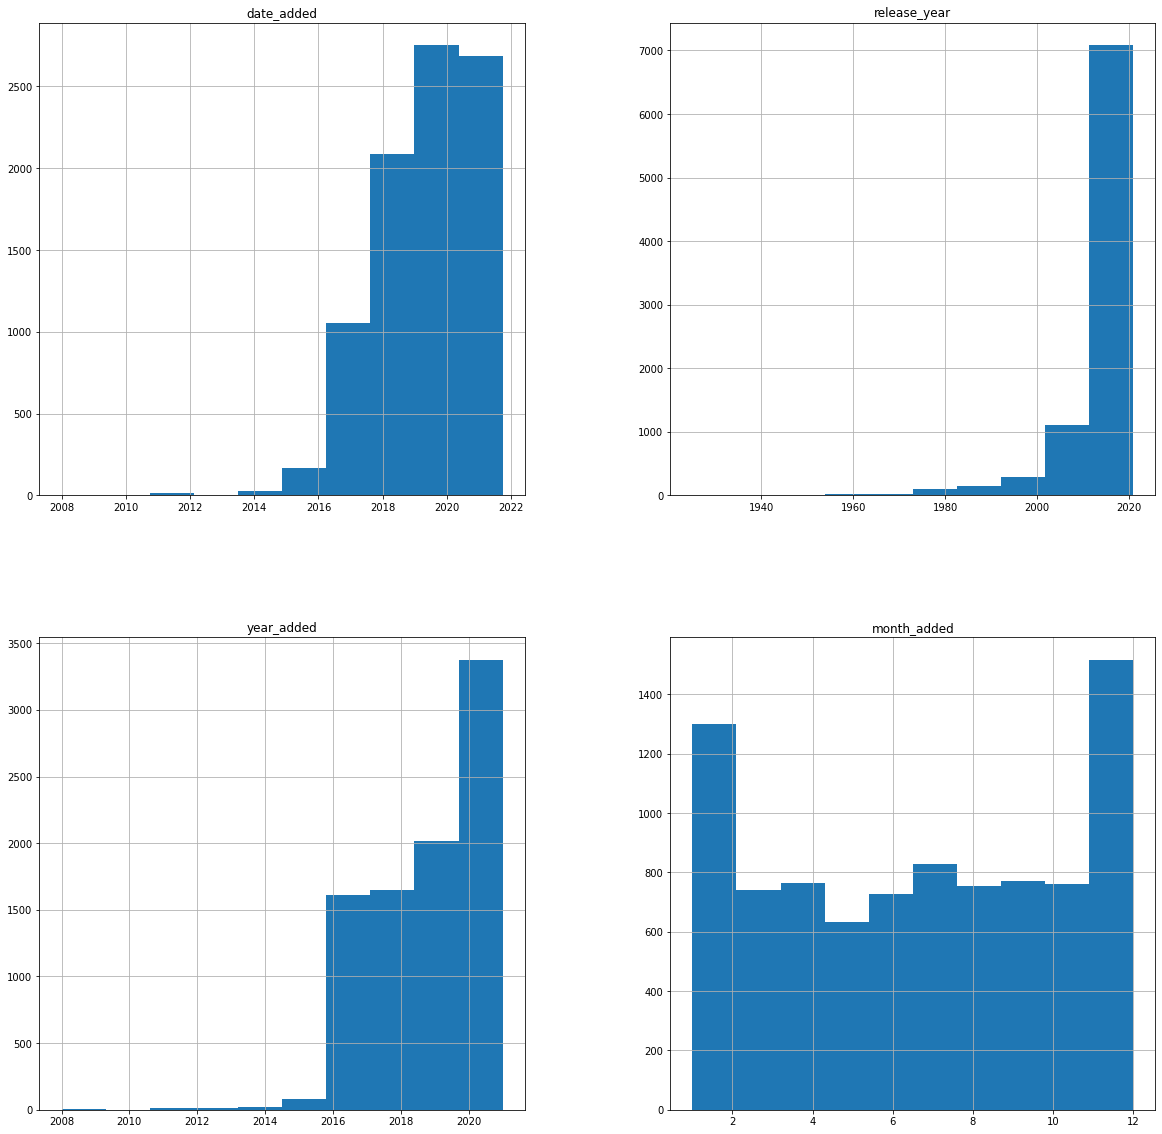

In [66]:
df.hist(figsize=(20,20))
plt.show()

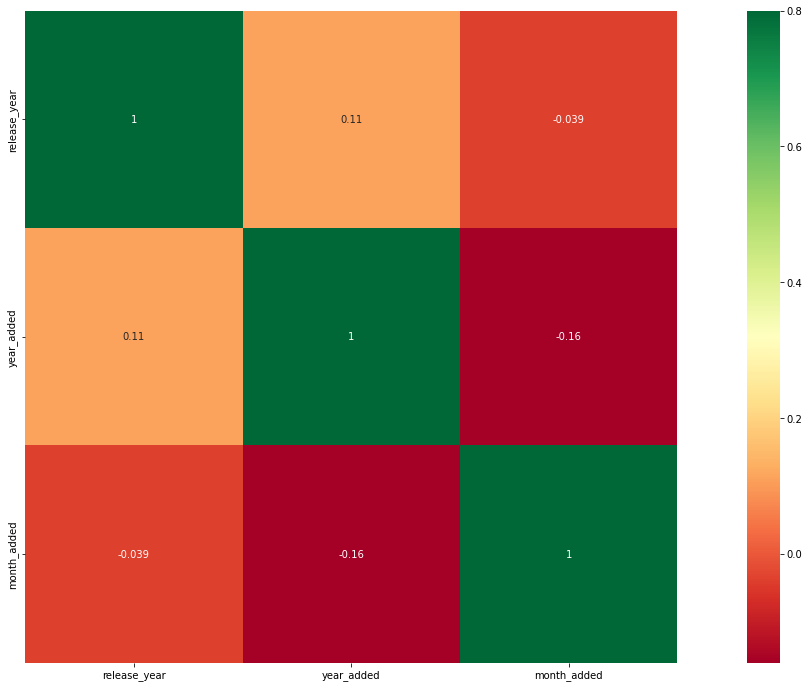

In [67]:
matrix = df.corr() 
f, ax = plt.subplots(figsize=(25, 12)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="RdYlGn",annot = True);

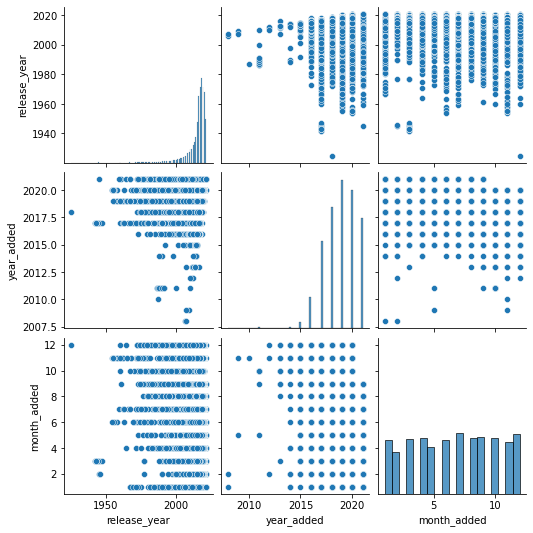

In [68]:
sns.pairplot(df)

In [69]:
def Count_categorcial_variables(df):
    categorcial_variables = df.select_dtypes(include=['object']).columns.tolist()
    #fig = plt.figure(figsize=(14, 18))

    for index, col in enumerate(categorcial_variables):
        print("------------",col," value counts---------------------")
        print(df[col].value_counts())
        #fig.add_subplot(3, 2, index+1)
        #dataframe[col].value_counts()[:20].plot(kind='bar', title=col, color = "royalblue")
        #plt.tight_layout()
        
    print("\n\n------------Number of categories in each columns---------------------")
    for i in categorcial_variables:
        a = df[i].unique()
        print("There are {} categories in {}".format(len(a),i))
Count_categorcial_variables(df)

------------ show_id  value counts---------------------
s1       1
s5866    1
s5860    1
s5861    1
s5862    1
        ..
s2926    1
s2925    1
s2924    1
s2923    1
s8807    1
Name: show_id, Length: 8793, dtype: int64
------------ title  value counts---------------------
Dick Johnson Is Dead                          1
Marvel Super Hero Adventures: Frost Fight!    1
Jimmy Carr: Funny Business                    1
My Beautiful Broken Brain                     1
Pee-wee's Big Holiday                         1
                                             ..
To All the Boys: P.S. I Still Love You        1
French Toast                                  1
Sleepless Society: Insomnia                   1
Palazuelos mi rey                             1
Zubaan                                        1
Name: title, Length: 8793, dtype: int64
------------ director  value counts---------------------
No Director                       2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter  

# Splitting the Dataset

In [70]:
df_movie = df[df['type']=='Movie'].copy()
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Teenager
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,9.0,Adults
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,Adults
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,9.0,Teenager
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,9.0,Adults


In [71]:
df_show = df[df['type']=='TV Show'].copy()
df_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Adults
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,Adults
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,Adults
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,9.0,Adults


# Data Visualisation
# Type: Movie and TV Shows

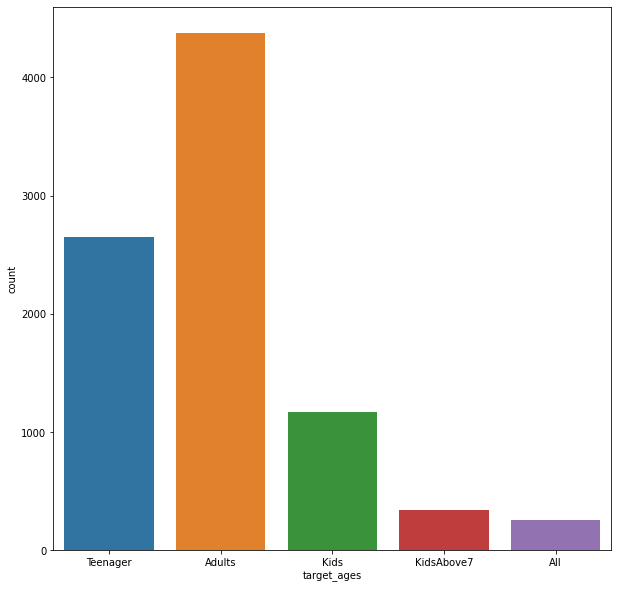

In [72]:
fig = plt.gcf()
fig.set_size_inches(10,10)
sns.countplot(df['target_ages'])
plt.show()

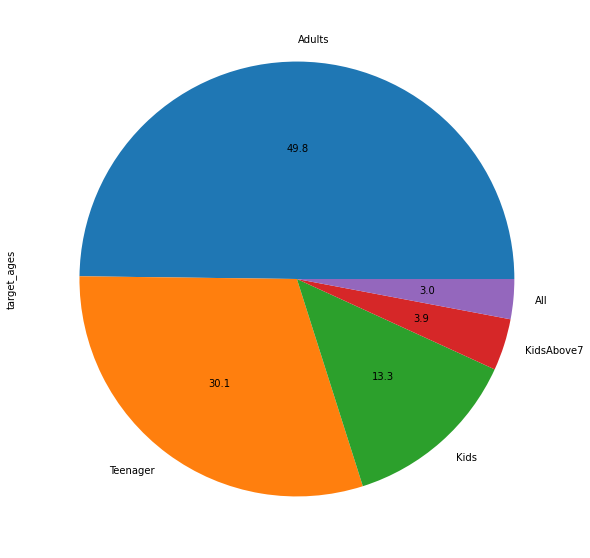

In [73]:
fig = plt.gcf()
fig.set_size_inches(10,10)
df['target_ages'].value_counts().plot(kind='pie', autopct='%.1f')
plt.show()

Text(0.5, 1.0, 'Type')

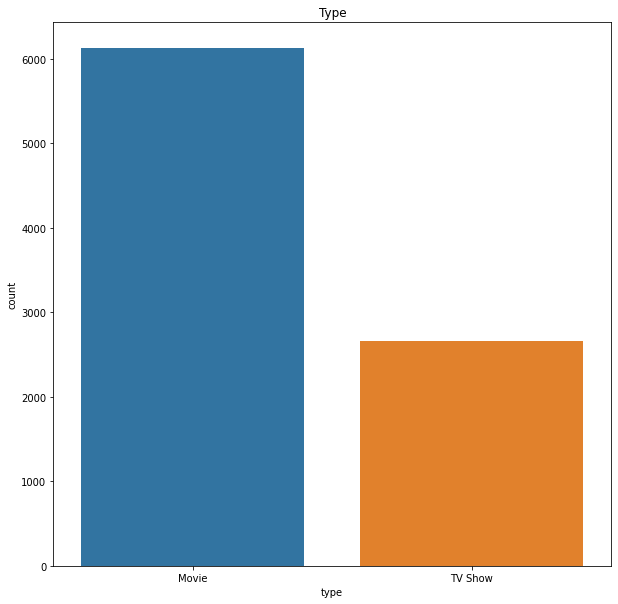

In [74]:
sns.countplot(df['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

# Rating of shows and movies

Text(0.5, 1.0, 'Rating')

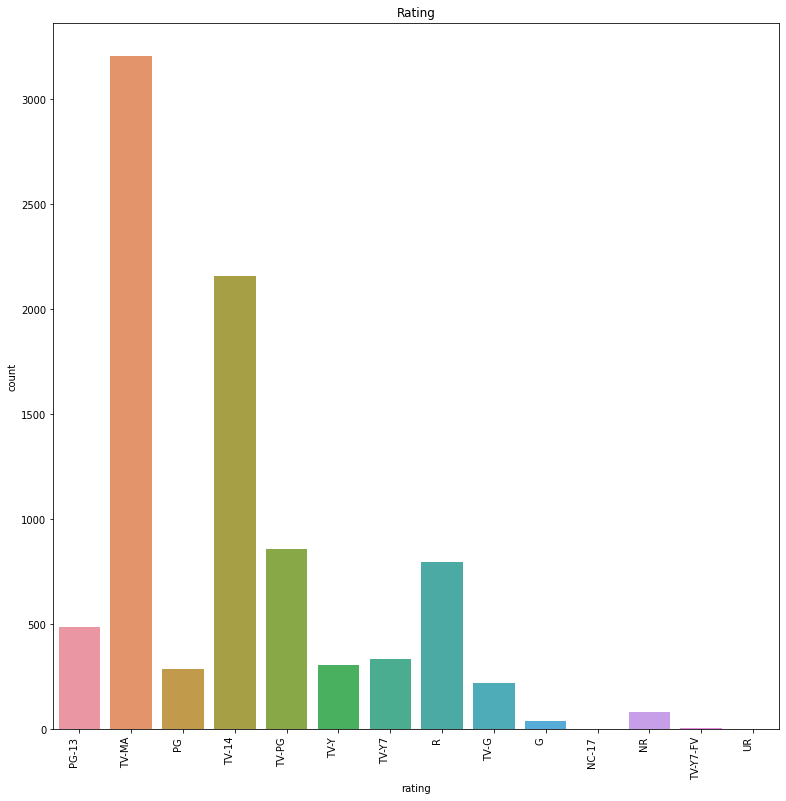

In [75]:
sns.countplot(df['rating'])
sns.countplot(df['rating']).set_xticklabels(sns.countplot(df['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

# Relation between Type and Rating

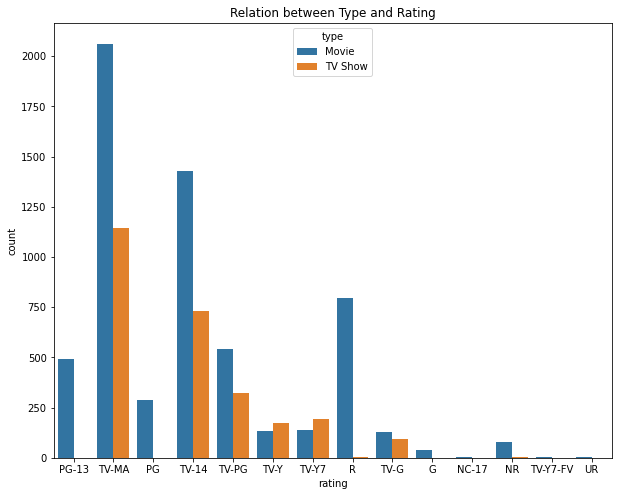

In [76]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'rating',hue = 'type',data = df)
plt.title('Relation between Type and Rating')
plt.show()

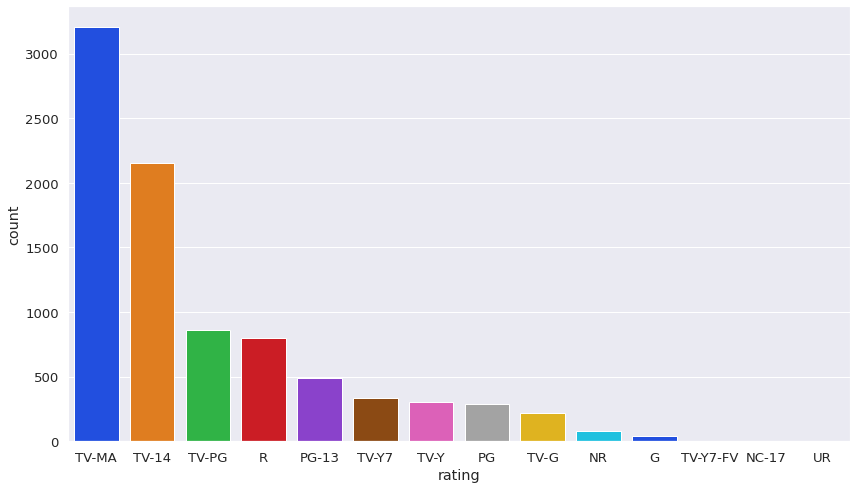

In [77]:
plt.figure(figsize = (14, 8))
sns.set_theme(font_scale = 1.2)
sns.countplot(data = df, x = 'rating', palette = 'bright', order = df['rating'].value_counts().index)
plt.show()

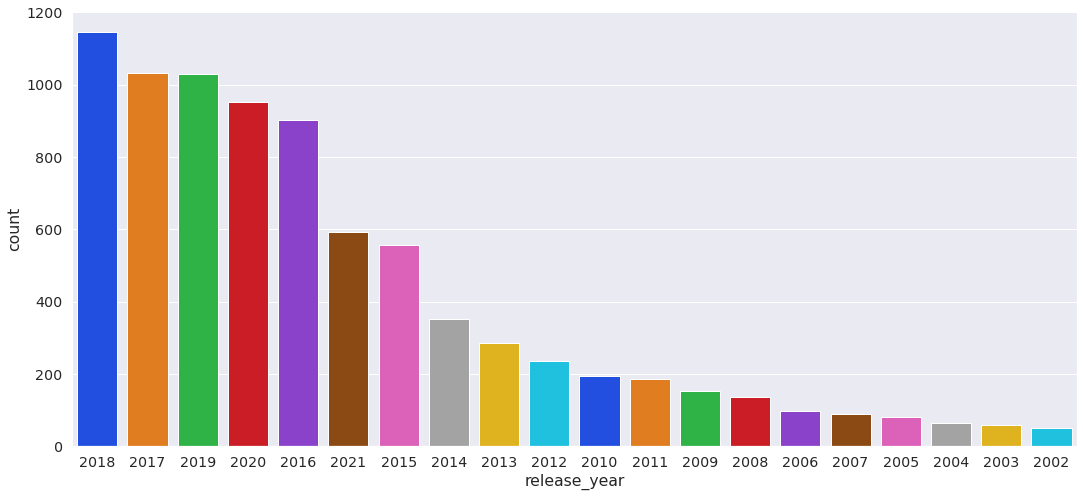

In [78]:
plt.figure(figsize = (18, 8))
sns.set_theme(font_scale = 1.3)
sns.countplot(data = df, x = 'release_year', palette = 'bright', order = df['release_year'].value_counts().index[:20])
plt.show()

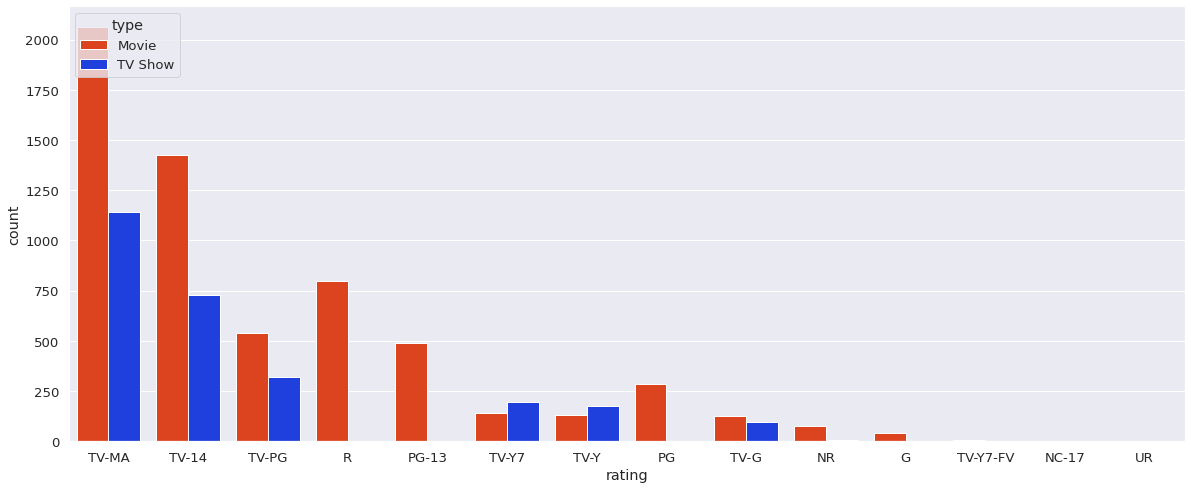

In [79]:
plt.figure(figsize = (20,8))
sns.set_theme(font_scale = 1.2)
sns.countplot(data = df, x = 'rating', hue = 'type', palette=['#FB3100',"#002CFB"], order = df['rating'].value_counts().index)
plt.show()

# Grouped Bar Chart

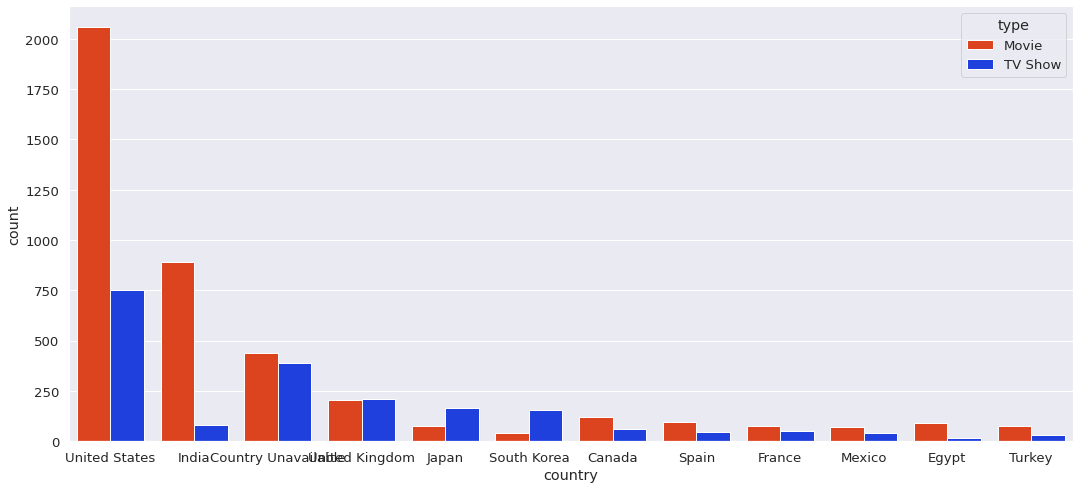

In [80]:
plt.figure(figsize = (18,8))
sns.set_theme(font_scale = 1.2)
sns.countplot(data = df, x = 'country', hue = 'type', palette=['#FB3100',"#002CFB"], order = df['country'].value_counts().index[: 12])
plt.show()

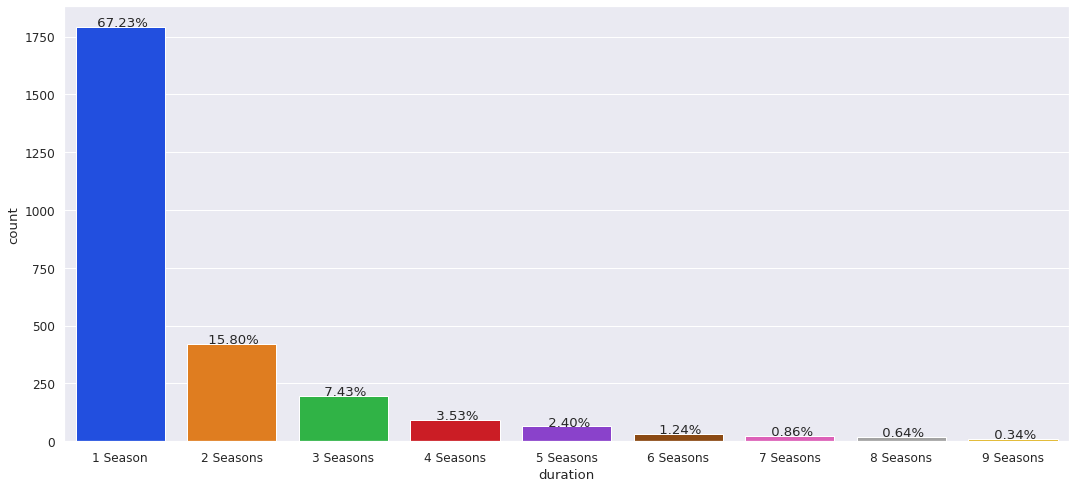

In [81]:
temp = df[df["type"] == "TV Show"]['duration']
total = float(len(temp))
sns.set_theme(font_scale = 1.1)
plt.figure(figsize= (18, 8))
ax = sns.countplot(x = temp, palette = 'bright', order = temp.value_counts().index[: 9])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, '{: 1.2f}%'.format(height / total * 100), ha="center") 
plt.show()

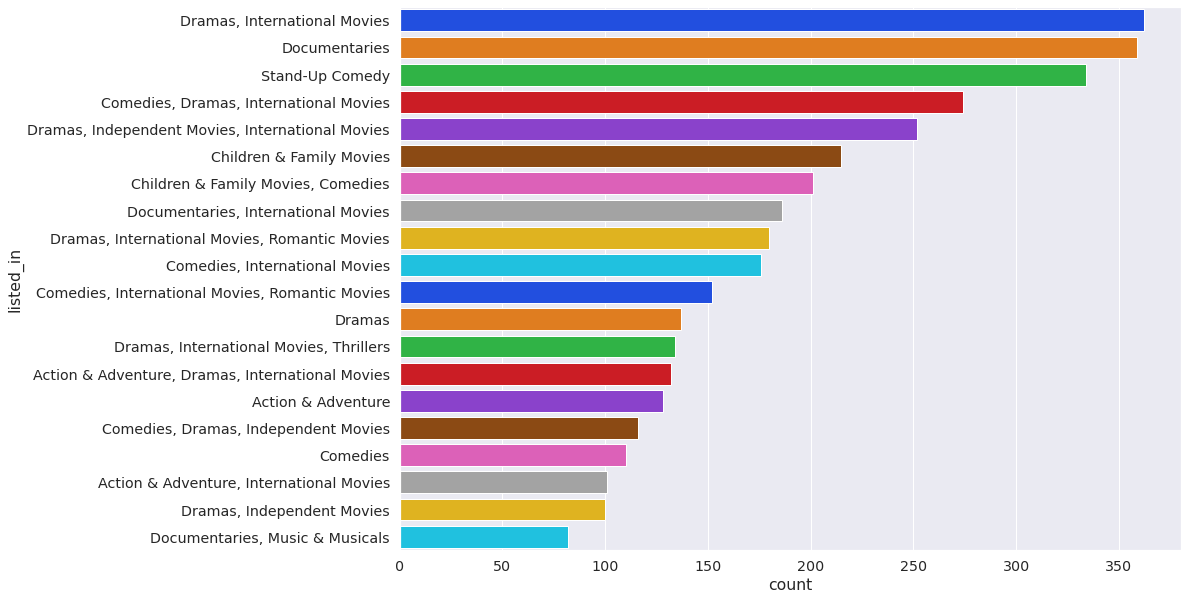

In [82]:
plt.figure(figsize = (14, 10))
sns.set_theme(font_scale = 1.3)
sns.countplot(data = df, y = 'listed_in', palette = 'bright', order = df[df['type'] == 'Movie']['listed_in'].value_counts().index[: 20])
plt.show()

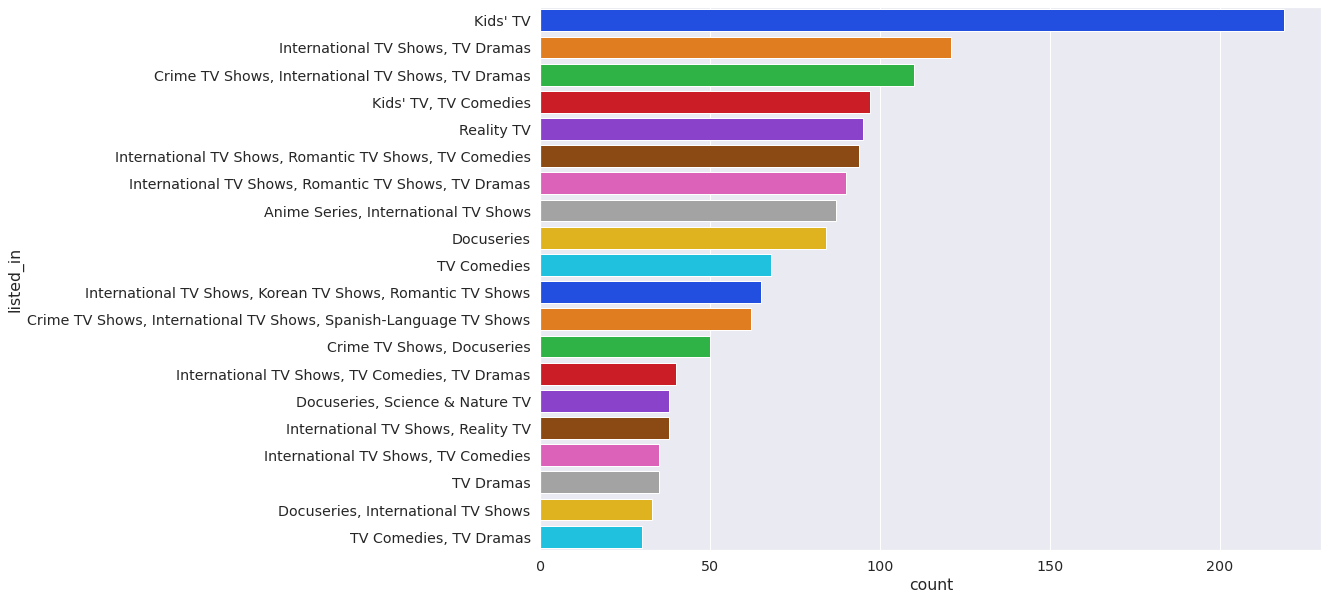

In [83]:
plt.figure(figsize = (14, 10))
sns.set_theme(font_scale = 1.3)
sns.countplot(data = df, y = 'listed_in', palette = 'bright', order = df[df['type'] == 'TV Show']['listed_in'].value_counts().index[: 20])
plt.show()

# List of Kid's TV Shows on Netflix.

In [84]:
kidShows = df[df['listed_in'] == 'Kids\' TV'].reset_index()
kidShows[['title', 'type', 'country', 'description', 'duration', 'release_year']]

,title,type,country,description,duration,release_year
0,Tayo and Little Wizards,TV Show,Country Unavailable,Tayo speeds into an adventure when his friends...,1 Season,2020
1,Chhota Bheem,TV Show,India,"A brave, energetic little boy with superhuman ...",3 Seasons,2021
2,Numberblocks,TV Show,United Kingdom,"In a place called Numberland, math adds up to ...",6 Seasons,2021
3,Mighty Raju,TV Show,Country Unavailable,"Born with superhuman abilities, young Raju wan...",4 Seasons,2017
4,Tobot Galaxy Detectives,TV Show,Country Unavailable,An intergalactic device transforms toy cars in...,2 Seasons,2019
...,...,...,...,...,...,...
214,V.R. Troopers,TV Show,United States,Three friends who study martial arts find them...,2 Seasons,1995
215,ViR: The Robot Boy,TV Show,Country Unavailable,Humanoid robot boy ViR lives with his inventor...,2 Seasons,2013
216,Yoko,TV Show,Country Unavailable,"Friends Mai, Oto and Vik's games at the park b...",1 Season,2016
217,YOM,TV Show,Country Unavailable,"With the mind of a human being, and the body o...",1 Season,2016


# List of Old Movies and TV Shows on Netflix.


In [85]:
Old = df.sort_values("release_year", ascending = True).reset_index()
Old[['title', 'type', 'country', 'description', 'duration', 'release_year']]

,title,type,country,description,duration,release_year
0,Pioneers: First Women Filmmakers*,TV Show,Country Unavailable,This collection restores films from women who ...,1 Season,1925
1,The Battle of Midway,Movie,United States,Director John Ford captures combat footage of ...,18 min,1942
2,Prelude to War,Movie,United States,Frank Capra's documentary chronicles the rise ...,52 min,1942
3,Undercover: How to Operate Behind Enemy Lines,Movie,United States,This World War II-era training film dramatizes...,61 min,1943
4,WWII: Report from the Aleutians,Movie,United States,Filmmaker John Huston narrates this Oscar-nomi...,45 min,1943
...,...,...,...,...,...,...
8788,Xtreme,Movie,Spain,"In this fast-paced and action-packed thriller,...",112 min,2021
8789,Trippin' with the Kandasamys,Movie,South Africa,"To rekindle their marriages, best friends-turn...",94 min,2021
8790,Sweet Tooth,TV Show,United States,On a perilous adventure across a post-apocalyp...,1 Season,2021
8791,Human: The World Within,TV Show,Country Unavailable,Cutting-edge science and captivating personal ...,1 Season,2021


# List of Indian Movies and TV Shows on Netflix.

In [86]:
In_Movie_TV = df[df['country'] == 'India'].reset_index()
In_Movie_TV[['title', 'type', 'description', 'duration', 'release_year']]

,title,type,description,duration,release_year
0,Kota Factory,TV Show,In a city of coaching centers known to train I...,2 Seasons,2021
1,Jeans,Movie,When the father of the man she loves insists t...,166 min,1998
2,Chhota Bheem,TV Show,"A brave, energetic little boy with superhuman ...",3 Seasons,2021
3,Dharmakshetra,TV Show,"After the ancient Great War, the god Chitragup...",1 Season,2014
4,Raja Rasoi Aur Anya Kahaniyan,TV Show,Explore the history and flavors of regional In...,1 Season,2014
...,...,...,...,...,...
967,Yanda Kartavya Aahe,Movie,Thanks to an arranged marriage that was design...,151 min,2006
968,Yeh Meri Family,TV Show,"In the summer of 1998, middle child Harshu bal...",1 Season,2018
969,Zed Plus,Movie,A philandering small-town mechanic's political...,131 min,2014
970,Zenda,Movie,A change in the leadership of a political part...,120 min,2009


# List of Movies and TV Shows released in 2018.

In [87]:
Movie_TV = df[df['release_year'] == 2018].reset_index()
Movie_TV[['title', 'type', 'country', 'description', 'duration', 'release_year']]

,title,type,country,description,duration,release_year
0,Resurrection: Ertugrul,TV Show,Turkey,When a good deed unwittingly endangers his cla...,5 Seasons,2018
1,Angry Birds,TV Show,Finland,"Birds Red, Chuck and their feathered friends h...",1 Season,2018
2,King of Boys,Movie,Nigeria,When a powerful businesswoman’s political ambi...,182 min,2018
3,Show Dogs,Movie,"United Kingdom, United States",A rough and tough police dog must go undercove...,90 min,2018
4,If I Leave Here Tomorrow: A Film About Lynyrd ...,Movie,United States,"Using interviews and archival footage, this do...",97 min,2018
...,...,...,...,...,...,...
1141,White Chamber,Movie,United Kingdom,"When a civil war ravages the UK, a scientist a...",89 min,2018
1142,Wildlife,Movie,United States,A teen’s life in 1960 Montana grows complicate...,105 min,2018
1143,يوم الدين,Movie,"Egypt, Austria, United States",A man cured of leprosy and a young orphan leav...,97 min,2018
1144,Yeh Meri Family,TV Show,India,"In the summer of 1998, middle child Harshu bal...",1 Season,2018


# Pie-chart for the Type: Movie and TV Shows

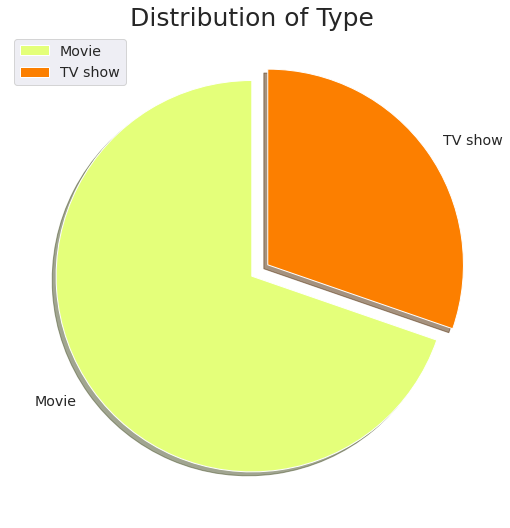

In [88]:
labels = ['Movie', 'TV show']
size = df['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

# Pie-chart for Rating

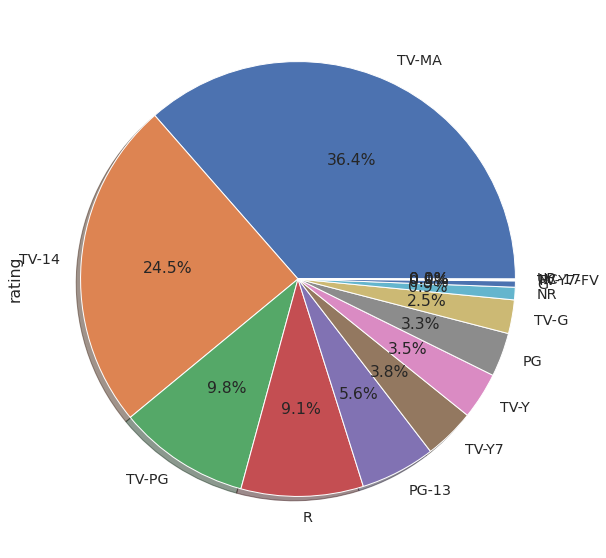

In [89]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(15,10))
plt.show()

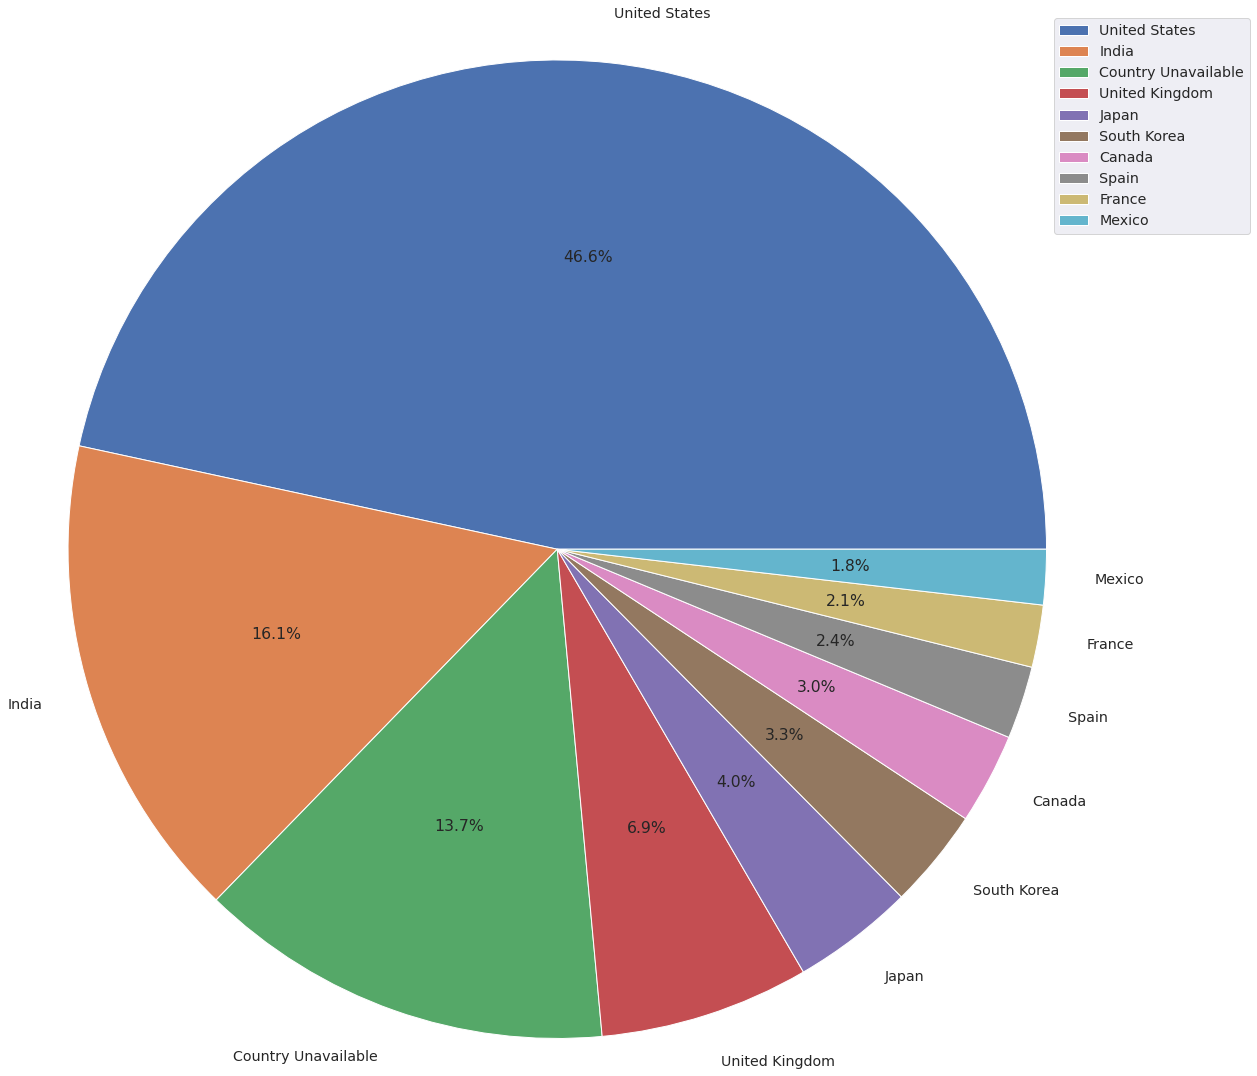

In [90]:
top_10 = df['country'].value_counts()[: 10]
plt.pie(top_10, labels = top_10.index, radius = 2.5, autopct = '%1.1f%%')
plt.legend(loc = 'upper left', bbox_to_anchor=(1.5,1.6))
plt.show()

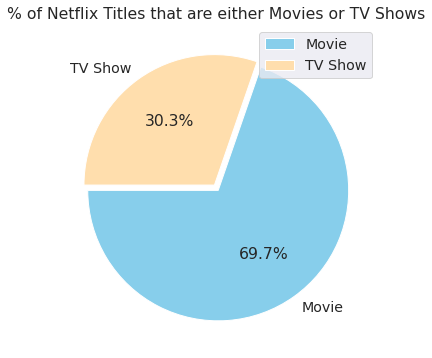

In [91]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(df.type.value_counts(), explode=(0.025,0.025), labels = df.type.value_counts().index, colors = ['skyblue','navajowhite'], 
            autopct = '%1.1f%%', startangle = 180);
plt.legend()
plt.show()

# WordCloud: Country

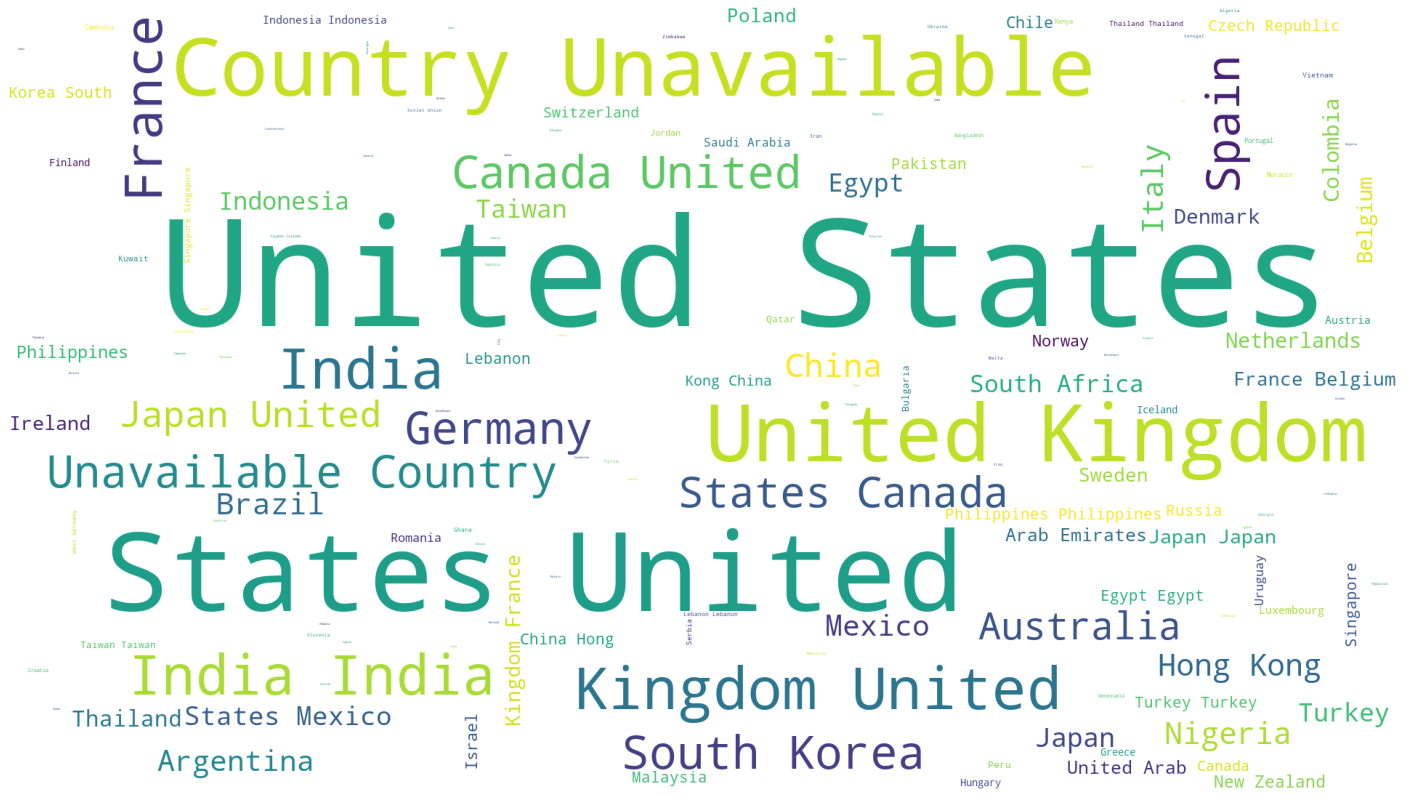

In [92]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

# Directors

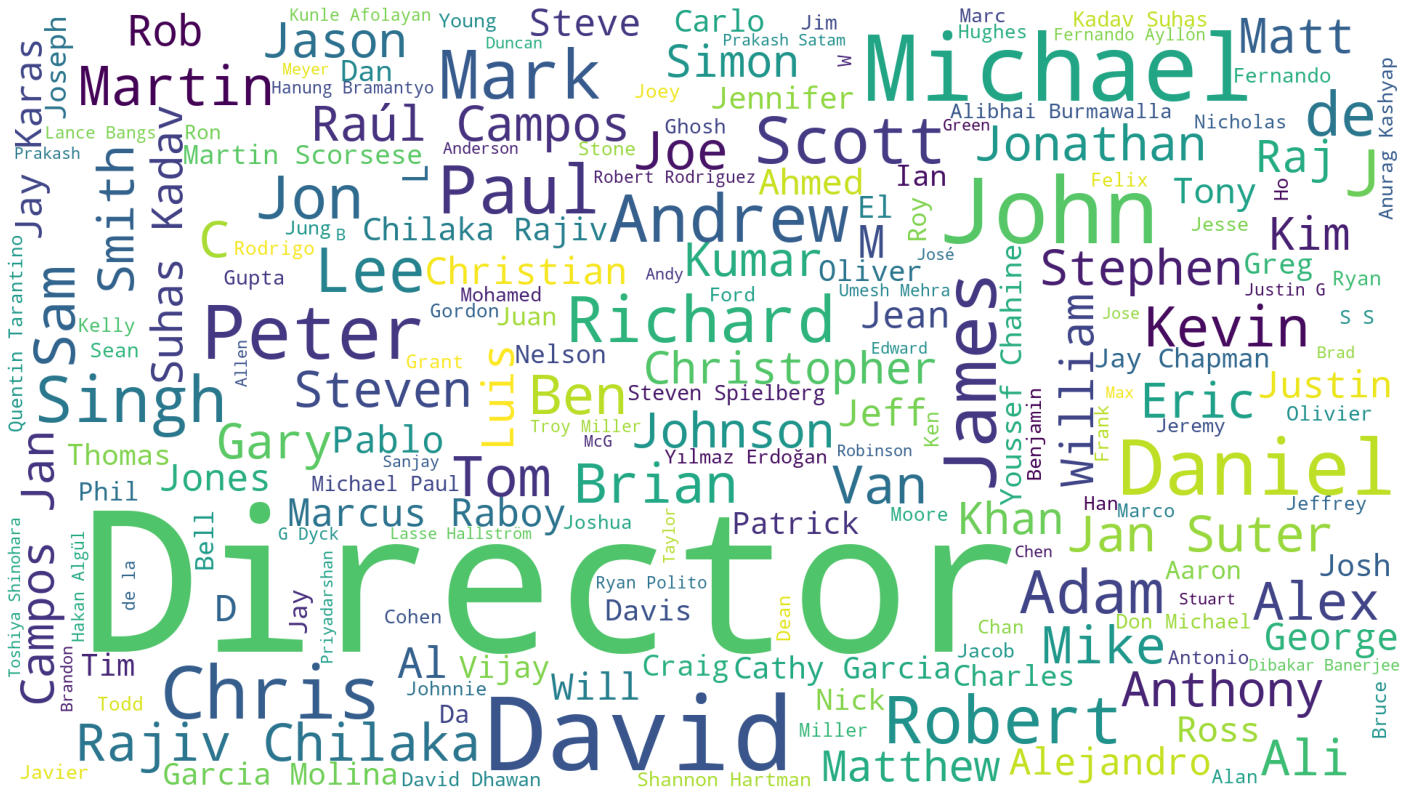

In [93]:
 plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

# Categories

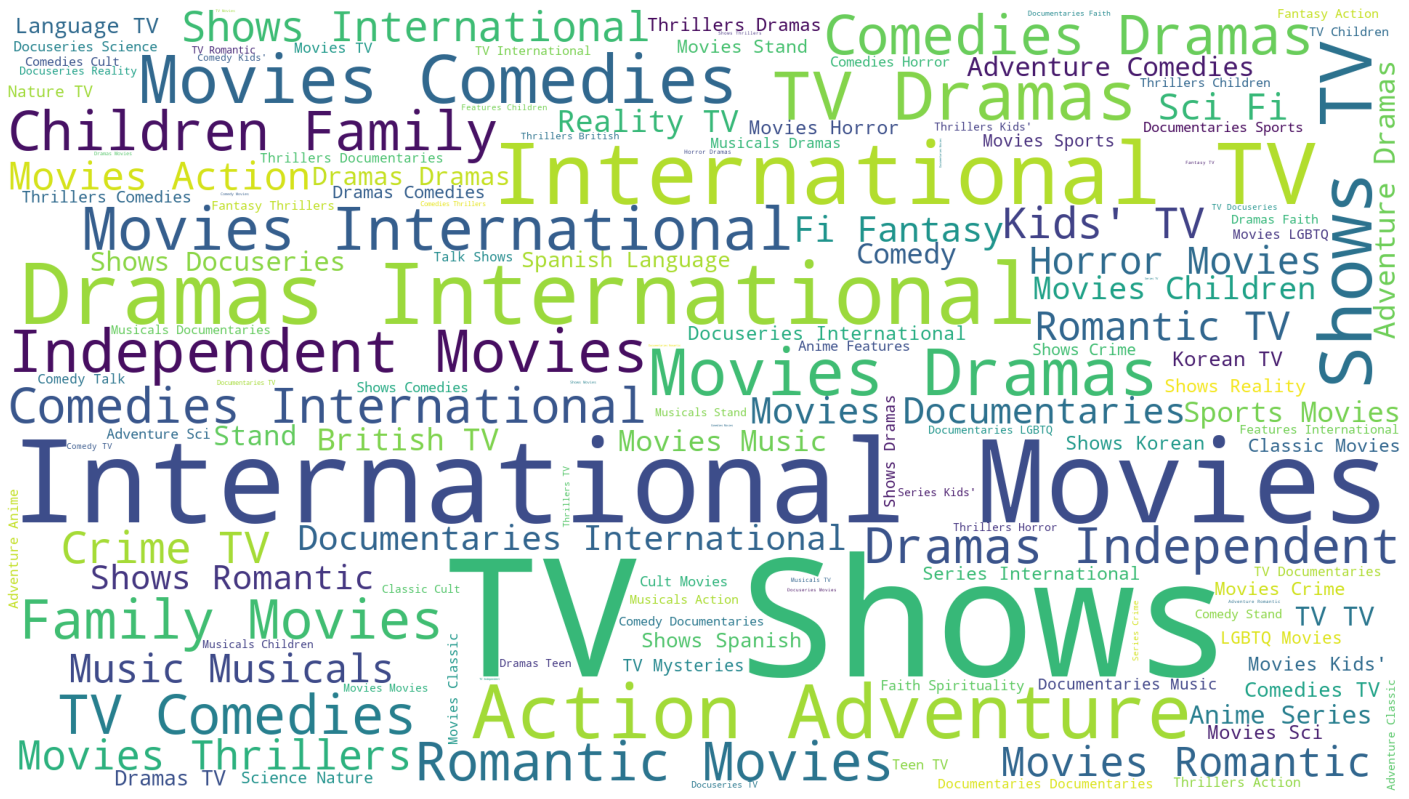

In [94]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

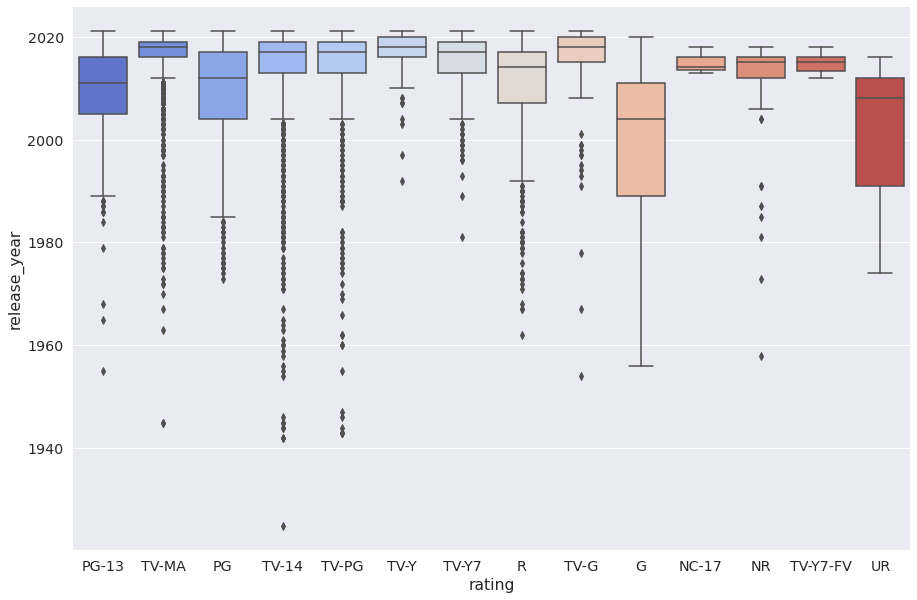

In [95]:
plt.figure(figsize=(15,10))
sns.boxplot(y = 'release_year', x = 'rating', data = df, palette = 'coolwarm')
sns.despine(left=True)

Text(0.5, 1.0, 'Type of Show by Release Date')

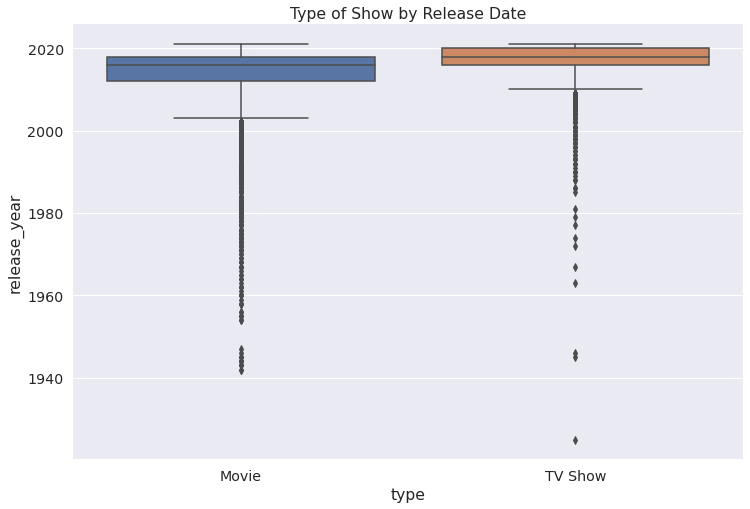

In [96]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'type', y = 'release_year', data = df )
sns.despine(left=True)
plt.title('Type of Show by Release Date')

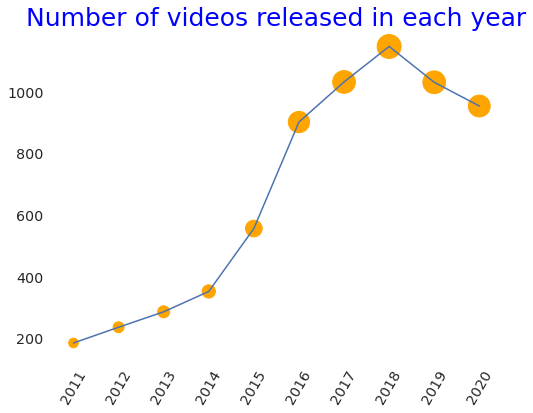

In [97]:
release = df['release_year'].value_counts()
release = release.sort_index(ascending=True)

title = 'Number of videos released in each year'
_ = plt.figure(figsize=(8,6))
_ = plt.plot(release[-11:-1])
_ = plt.scatter(release[-11:-1].index, release[-11:-1].values, s=0.5*release[-11:-1].values, c='orange');
_ = plt.box(on=None);
_ = plt.xticks(rotation = 60)
_ = plt.xticks(release[-11:-1].index);
_ = plt.title(title, color='blue', fontsize=25);

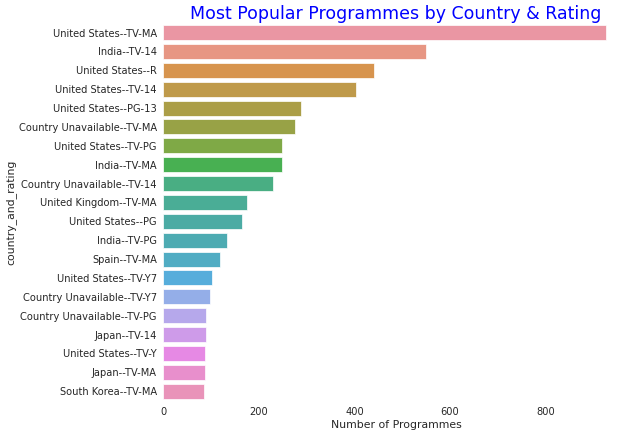

In [98]:
country_rating = df.groupby(['country', 'rating']).count().sort_values('show_id', ascending=False).reset_index()
country_rating['country_and_rating'] = country_rating[['country','rating']].apply(axis=1,func = lambda x : str(x.country)+'--'+str(x.rating))
country_rating.set_index(keys = 'country_and_rating', inplace = True)

title = 'Most Popular Programmes by Country & Rating'
_ = plt.figure(figsize=(12,10), dpi = 50)
plots = sns.barplot(y=country_rating.index[:20], x = country_rating['show_id'][:20]);
_ = plt.box(on=None)
_ = plt.title(title, fontsize=25, color='blue')
_ = plt.xlabel('Number of Programmes');

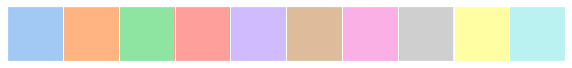

In [99]:
palette = sns.color_palette('pastel')
sns.palplot(palette)

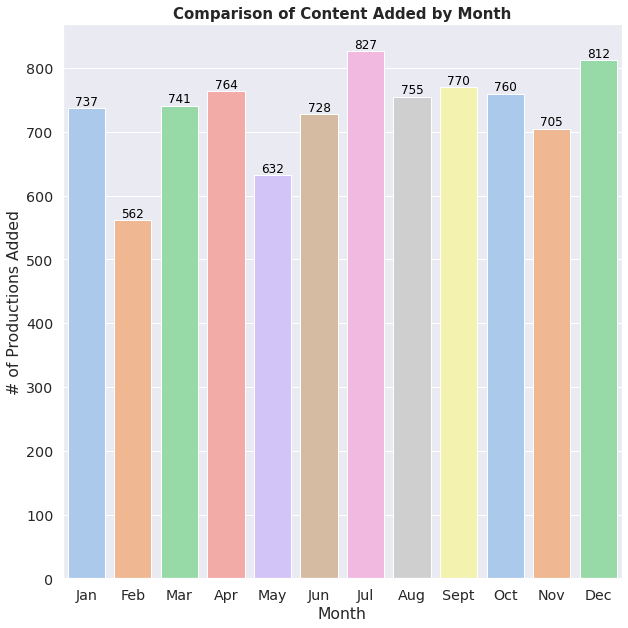

In [100]:
months_content = sns.countplot(data = df,x = df['month_added'],palette = palette[0:9])
for p in months_content.patches:
        months_content.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()),
                    ha = 'center', va = 'bottom', fontsize = 12,color = 'black')
plt.xticks(ticks = np.arange(0,12,1),labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                            'Aug','Sept','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('# of Productions Added')
plt.title('Comparison of Content Added by Month',fontsize = 15,fontweight = 'bold')
plt.tight_layout()